<a href="https://colab.research.google.com/github/mpalominocol/Projects/blob/main/WB_Data_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Load Economic indicators

In [278]:
# Import libraries
import pandas as pd
import requests
import json


## **Step 1:** Define parameters for indicators extractions.

**List of countreis:**

US: EEUU  
CA: Canada  
FR: France  
DE: Germany
IT: Italy  
JP: Japan  
GB: Greate Britan
CN: China
RU: Russia

---
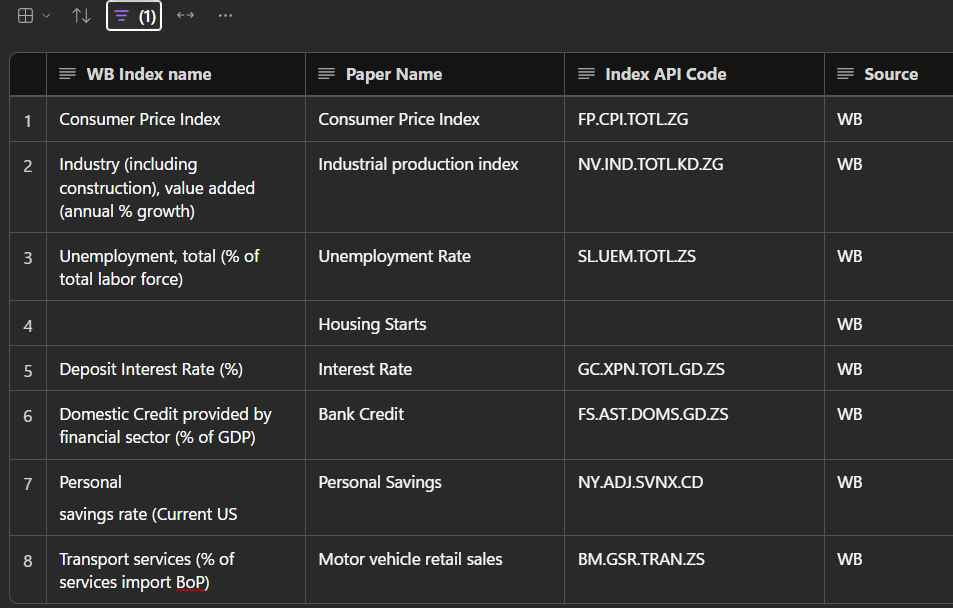
Indicators =
'FP.CPI.TOTL.ZG' = Consumer Price Index , 'NV.IND.TOTL.KD.ZG','SL.UEM.TOTL.ZS','SP.POP.TOTL','GC.XPN.TOTL.GD.ZS', 'FS.AST.DOMS.GD.ZS','NY.ADJ.SVNX.CD','BM.GSR.TRAN.ZS']


In [279]:
# Libraries

import pandas as pd
import requests
import json



### World Bank API Parameters

In [280]:
# Extract parameters for WB API indicators
# Countries
countries = ['US','CA','FR','DE','IT','JP','GB','CN','RU']
# Economic Indicators
indicators = ['FP.CPI.TOTL.ZG', 'NV.IND.TOTL.KD.ZG','SL.UEM.TOTL.ZS','SP.POP.TOTL','GC.XPN.TOTL.GD.ZS', 'FS.AST.DOMS.GD.ZS','NY.ADJ.SVNX.CD','BM.GSR.TRAN.ZS']
start_date = '1900'
end_date = '2025'

### Loop for WB indicators Extraction

In [281]:
# indicators extraction Loop

data = []

for country in countries:
    for indicator in indicators:
        url = f'https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?date={start_date}:{end_date}&format=json'
        response = requests.get(url)
        try:
            data_json = response.json()
            if len(data_json) > 1:  # Check if data is available
                for item in data_json[1]:
                    data.append([
                        country,
                        item['date'][:4], #Year
                        indicator,
                        item['value']
                    ])
        except (json.JSONDecodeError, KeyError, IndexError) as e:
            print(f"Error processing data for {country}, {indicator}: {e}")
            print(response.text)

df_indicators = pd.DataFrame(data, columns=['Country', 'Year', 'Indicator', 'Value'])


### Format Extraction Resul

In [282]:
# Pivot to convert data table into desaire format

# Pivot the DataFrame to have indicators as columns
pvt_indicators = df_indicators.pivot_table(index=['Year'], columns=['Country','Indicator'], values='Value').reset_index()

# Rename columns to include country in column name
new_columns = []
for col in pvt_indicators.columns:
    if isinstance(col, tuple):
        new_columns.append(f"{col[0]}_{col[1]}")  # Concatenate country and indicator
    else:
        new_columns.append(col)

pvt_indicators.columns = new_columns


### Visual of extraction result

In [283]:
# Last Years available

pvt_indicators.tail()

,Year_,CA_BM.GSR.TRAN.ZS,CA_FP.CPI.TOTL.ZG,CA_FS.AST.DOMS.GD.ZS,CA_GC.XPN.TOTL.GD.ZS,CA_NV.IND.TOTL.KD.ZG,CA_NY.ADJ.SVNX.CD,CA_SL.UEM.TOTL.ZS,CA_SP.POP.TOTL,CN_BM.GSR.TRAN.ZS,...,RU_NY.ADJ.SVNX.CD,RU_SL.UEM.TOTL.ZS,RU_SP.POP.TOTL,US_BM.GSR.TRAN.ZS,US_FP.CPI.TOTL.ZG,US_FS.AST.DOMS.GD.ZS,US_GC.XPN.TOTL.GD.ZS,US_NY.ADJ.SVNX.CD,US_SL.UEM.TOTL.ZS,US_SP.POP.TOTL
45,2019,19.413684,1.949269,NaN,15.163927,0.288035,1.038381e+11,5.690,37618495.0,20.801686,...,1.190286e+11,4.496,145453291.0,19.014151,1.812210,246.211031,13.330023,1.498549e+12,3.669,328329953.0
46,2020,16.786701,0.717000,NaN,25.320352,-5.883383,6.282113e+10,9.657,38028638.0,24.823521,...,1.253701e+11,5.589,145245148.0,15.617915,1.233584,281.470939,19.614290,1.236543e+12,8.055,331526933.0
47,2021,17.964439,3.395193,NaN,19.696654,5.627890,1.503378e+11,7.527,38239864.0,33.284173,...,1.130492e+11,4.715,144746762.0,18.742224,4.697859,292.804695,20.432473,1.032177e+12,5.349,332048977.0
48,2022,19.091339,6.802801,NaN,15.712357,3.206648,NaN,5.280,38939056.0,36.627693,...,NaN,3.867,144236933.0,22.091717,8.002800,250.091382,15.513263,NaN,3.650,333271411.0
49,2023,16.658197,3.879002,NaN,NaN,-0.895394,NaN,5.366,40097761.0,29.656727,...,NaN,3.325,143826130.0,19.095557,4.116338,254.243541,NaN,NaN,3.625,334914895.0


In [284]:
pvt_indicators.head()

,Year_,CA_BM.GSR.TRAN.ZS,CA_FP.CPI.TOTL.ZG,CA_FS.AST.DOMS.GD.ZS,CA_GC.XPN.TOTL.GD.ZS,CA_NV.IND.TOTL.KD.ZG,CA_NY.ADJ.SVNX.CD,CA_SL.UEM.TOTL.ZS,CA_SP.POP.TOTL,CN_BM.GSR.TRAN.ZS,...,RU_NY.ADJ.SVNX.CD,RU_SL.UEM.TOTL.ZS,RU_SP.POP.TOTL,US_BM.GSR.TRAN.ZS,US_FP.CPI.TOTL.ZG,US_FS.AST.DOMS.GD.ZS,US_GC.XPN.TOTL.GD.ZS,US_NY.ADJ.SVNX.CD,US_SL.UEM.TOTL.ZS,US_SP.POP.TOTL
0,1974,33.965176,10.997171,56.001492,NaN,NaN,NaN,NaN,22807969.0,NaN,...,NaN,NaN,133432000.0,37.165282,11.054805,113.781809,NaN,NaN,NaN,213854000.0
1,1975,35.180688,10.672189,57.177955,NaN,NaN,NaN,NaN,23143275.0,NaN,...,NaN,NaN,134200000.0,35.788056,9.143147,113.664693,NaN,NaN,NaN,215973000.0
2,1976,30.395284,7.541739,58.797823,NaN,NaN,NaN,NaN,23449808.0,NaN,...,NaN,NaN,135147000.0,37.816138,5.744813,113.992250,NaN,NaN,NaN,218035000.0
3,1977,29.246262,7.976445,73.988579,NaN,NaN,NaN,NaN,23725843.0,NaN,...,NaN,NaN,136100000.0,38.798408,6.501684,113.624040,NaN,NaN,NaN,220239000.0
4,1978,28.284617,8.973723,78.544220,NaN,NaN,NaN,NaN,23963203.0,NaN,...,NaN,NaN,137060000.0,37.898391,7.630964,113.720597,NaN,NaN,NaN,222585000.0


**Result:** We have economic indicators from 1975 to for the countries.

In [285]:
df_num =pvt_indicators.iloc[:,1:]

In [286]:
# Export to CSV
pvt_indicators.to_csv('world_bank_data.csv', index=False)

#### Missing values verification

In [287]:
# Verrify missing values

# Check for missing values in the DataFrame
missing_values = pvt_indicators.isnull().sum()

# Print the count of missing values for each column
print("Missing Values per Column:\n", missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (pvt_indicators.isnull().sum() / len(pvt_indicators)) * 100

# Print the percentage of missing values for each column
print("\nMissing Value Percentage per Column:\n", missing_percentage)



Missing Values per Column:
 Year_                    0
CA_BM.GSR.TRAN.ZS        0
CA_FP.CPI.TOTL.ZG        0
CA_FS.AST.DOMS.GD.ZS    17
CA_GC.XPN.TOTL.GD.ZS    17
                        ..
US_FS.AST.DOMS.GD.ZS     0
US_GC.XPN.TOTL.GD.ZS    16
US_NY.ADJ.SVNX.CD       18
US_SL.UEM.TOTL.ZS       17
US_SP.POP.TOTL           0
Length: 66, dtype: int64

Missing Value Percentage per Column:
 Year_                    0.0
CA_BM.GSR.TRAN.ZS        0.0
CA_FP.CPI.TOTL.ZG        0.0
CA_FS.AST.DOMS.GD.ZS    34.0
CA_GC.XPN.TOTL.GD.ZS    34.0
                        ... 
US_FS.AST.DOMS.GD.ZS     0.0
US_GC.XPN.TOTL.GD.ZS    32.0
US_NY.ADJ.SVNX.CD       36.0
US_SL.UEM.TOTL.ZS       34.0
US_SP.POP.TOTL           0.0
Length: 66, dtype: float64


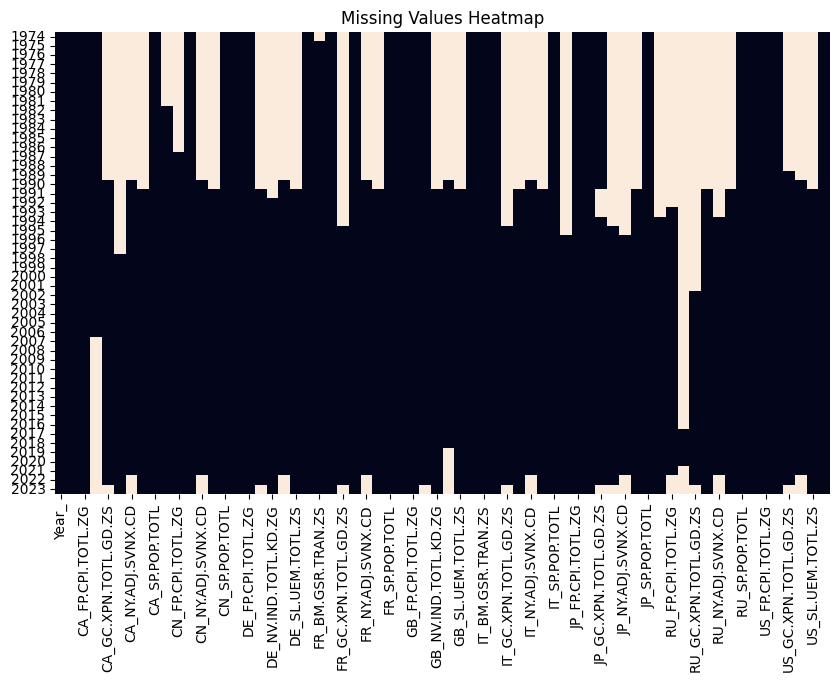

In [288]:
# Missing values Chat
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Use 'Year_' instead of 'Year' to access the correct column
sns.heatmap(pvt_indicators.isnull(), cbar=False, yticklabels=pvt_indicators['Year_'])
plt.title('Missing Values Heatmap')
plt.show()

### There is more informaiton since 1990

## Step2:  Correlation


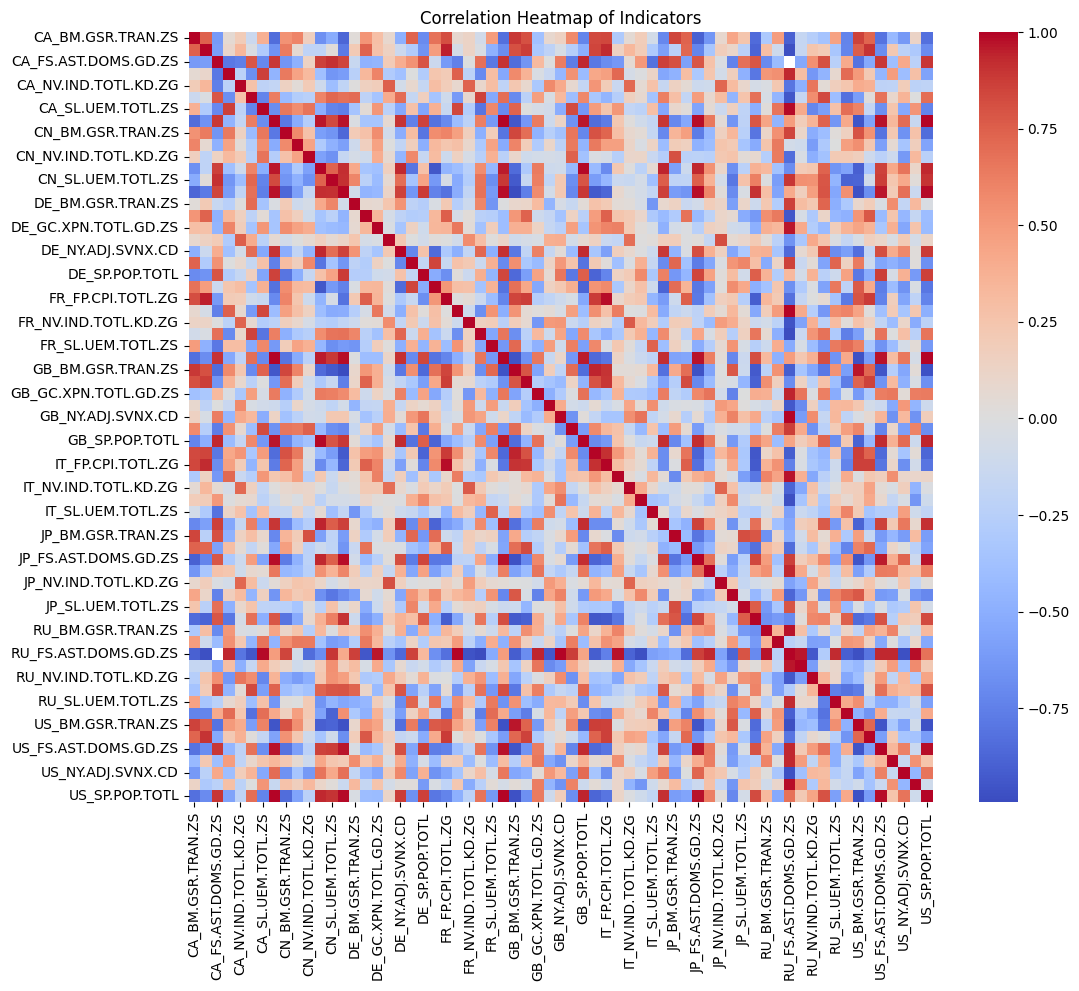

In [289]:
# prompt: Correlation heat map for pvt_indicators

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_num.corr(), cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Indicators')
plt.show()

Correlations over 0.95:
Total Correlations above
65


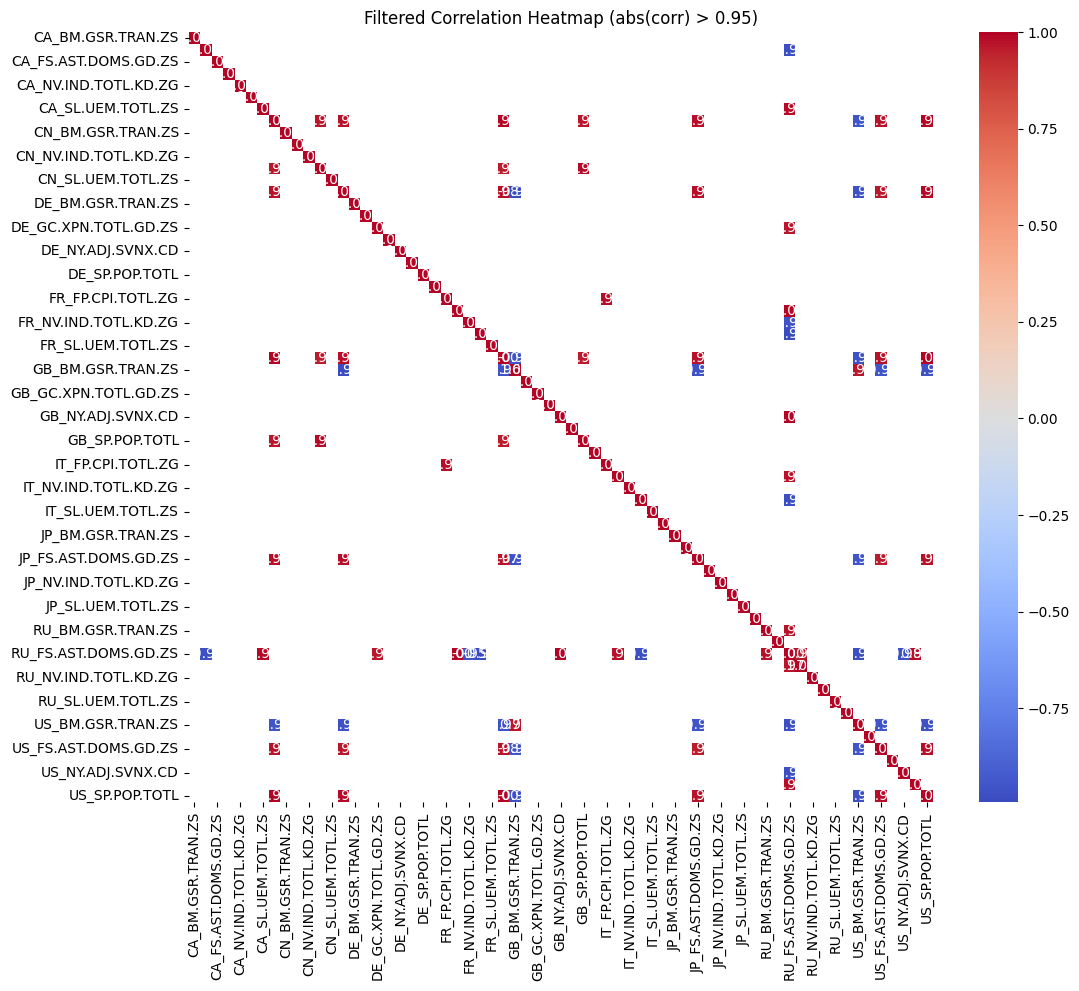

In [290]:
# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Filter correlations above 0.95 (excluding self-correlations)
filtered_correlations = correlation_matrix[abs(correlation_matrix) > 0.95]

# Print count of correlations above 0.95
print("Correlations over 0.95:")

print("Total Correlations above",  )
cor_over = filtered_correlations.count()
print(cor_over.count())

# Plotting the filtered correlations
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlations, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Filtered Correlation Heatmap (abs(corr) > 0.95)')
plt.show()

In [291]:
# Count "not nulls" in filtered_correlations1

# Count non-null values in the filtered_correlations1 DataFrame
non_null_count = filtered_correlations1.notnull().sum().sum()

print(f"Number of 'not nulls' in filtered_correlations1: {non_null_count}")

Number of 'not nulls' in filtered_correlations1: 92


## 46 varaibles have a correlation over 95%

In [292]:
# Count null values in filtered_correlations1

# Count null values in the filtered_correlations1 DataFrame
null_count = filtered_correlations1.isnull().sum().sum()

print(f"Number of null values in filtered_correlations1: {null_count}")

Number of null values in filtered_correlations1: 4133


In [293]:
filtered_correlations1.size

4225

In [294]:
(filtered_correlations1.size - null_count)/2

46.0

#2 Getting ETF Historical Price Data

## Step 1: Conect to API and extract Data

In [296]:
pip install yfinance

In [ ]:
fROM pip install yfinanceEXTRACT

In [298]:
import yfinance as yf

# Download data for a specific ETF (e.g., SPY)
etf = yf.download('SPY', start='1900-01-01', end='2025-01-01')

etf.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
1993-01-29 00:00:00+00:00,24.608614,43.93750,43.96875,43.75000,43.96875,1003200
1993-02-01 00:00:00+00:00,24.783649,44.25000,44.25000,43.96875,43.96875,480500
1993-02-02 00:00:00+00:00,24.836161,44.34375,44.37500,44.12500,44.21875,201300
1993-02-03 00:00:00+00:00,25.098686,44.81250,44.84375,44.37500,44.40625,529400
1993-02-04 00:00:00+00:00,25.203716,45.00000,45.09375,44.46875,44.96875,531500


In [299]:
etf.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2024-10-28 00:00:00+00:00,580.830017,580.830017,582.710022,580.520020,582.580017,30174700
2024-10-29 00:00:00+00:00,581.770020,581.770020,582.909973,578.429993,579.849976,42899700
2024-10-30 00:00:00+00:00,580.010010,580.010010,583.320007,579.289978,581.289978,41435800
2024-10-31 00:00:00+00:00,568.640015,568.640015,575.630005,568.440002,575.559998,60182500
2024-11-01 00:00:00+00:00,571.039978,571.039978,575.549988,570.619995,571.320007,45540200


In [300]:
etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7998 entries, 1993-01-29 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, SPY)  7998 non-null   float64
 1   (Close, SPY)      7998 non-null   float64
 2   (High, SPY)       7998 non-null   float64
 3   (Low, SPY)        7998 non-null   float64
 4   (Open, SPY)       7998 non-null   float64
 5   (Volume, SPY)     7998 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 437.4 KB


## Step 2: Resamble data on  Yearly bases

In [301]:
# Resample daily ETF prices to yearly
etf_yearly = etf['Adj Close'].resample('YE').mean()

etf_yearly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 1993-12-31 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
Freq: YE-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


In [302]:
# Set the DateTime index to the Year
etf_yearly['Year'] = etf_yearly.index.year  # Create a new column with just the year

# Optionally, you can drop the DateTime index if you only want the Year column
etf_yearly.reset_index(drop=True, inplace=True)

etf_yearly

# Set 'Year' as the index
etf_yearly.set_index('Year', inplace=True)

In [303]:
etf_yearly.tail()

Ticker,SPY
Year,
2020,301.390253
2021,406.294687
2022,394.980029
2023,419.735736
2024,528.401473


In [304]:
etf_yearly.head()

Ticker,SPY
Year,
1993,25.703473
1994,26.761102
1995,32.336435
1996,40.853853
1997,54.157629


# 3 Meger SP500 ETF data with Economics index

In [307]:
# prompt: In  pvt_indicators change column Year_ to int32

pvt_indicators['Year_'] = pvt_indicators['Year_'].astype('int32')

In [ ]:
etf_yearly.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   0 non-null      float64
dtypes: float64(1)
memory usage: 0.0 bytes


In [309]:
# Merge the two DataFrames based on the "Year" column
merged_df = pd.merge(pvt_indicators, etf_yearly, left_on='Year_', right_on='Year', how='inner')

# Display the merged DataFrame
merged_df

,Year_,CA_BM.GSR.TRAN.ZS,CA_FP.CPI.TOTL.ZG,CA_FS.AST.DOMS.GD.ZS,CA_GC.XPN.TOTL.GD.ZS,CA_NV.IND.TOTL.KD.ZG,CA_NY.ADJ.SVNX.CD,CA_SL.UEM.TOTL.ZS,CA_SP.POP.TOTL,CN_BM.GSR.TRAN.ZS,...,RU_SL.UEM.TOTL.ZS,RU_SP.POP.TOTL,US_BM.GSR.TRAN.ZS,US_FP.CPI.TOTL.ZG,US_FS.AST.DOMS.GD.ZS,US_GC.XPN.TOTL.GD.ZS,US_NY.ADJ.SVNX.CD,US_SL.UEM.TOTL.ZS,US_SP.POP.TOTL,SPY
0,1993,24.621099,1.865079,112.053218,22.650685,NaN,2.221179e+10,11.377,28684764.0,45.521768,...,5.883,148458777.0,29.319469,2.951657,158.395173,14.539206,3.990089e+11,6.900,259919000.0,25.703473
1,1994,25.013835,0.165563,111.569348,21.233453,NaN,3.715584e+10,10.395,29000663.0,46.757470,...,8.131,148407912.0,29.734360,2.607442,156.338856,13.818682,5.196490e+11,6.119,263126000.0,26.761102
2,1995,24.860741,2.148760,110.652449,20.922151,NaN,4.909413e+10,9.489,29302311.0,37.767823,...,9.449,148375787.0,29.837352,2.805420,166.236499,13.545209,5.612486e+11,5.650,266278000.0,32.336435
3,1996,22.461121,1.570531,115.187699,19.788587,NaN,5.128315e+10,9.620,29610218.0,45.658623,...,9.665,148160129.0,28.656178,2.931204,171.585278,12.990761,6.635695e+11,5.451,269394000.0,40.853853
4,1997,22.778208,1.621216,117.093820,17.829738,NaN,5.817502e+10,9.101,29905948.0,35.168682,...,11.813,147915361.0,28.688846,2.337690,180.069289,12.484564,8.255616e+11,5.000,272657000.0,54.157629
5,1998,21.714179,0.995942,115.546369,17.611497,2.869532,4.429286e+10,8.279,30155173.0,24.860315,...,13.261,147670784.0,28.145409,1.552279,190.517731,12.030807,8.968669e+11,4.511,275854000.0,68.256305
6,1999,21.144078,1.734843,113.950851,17.300631,5.988102,5.793827e+10,7.583,30401286.0,24.602112,...,13.036,147214776.0,25.359987,2.188027,201.879418,11.716331,8.945149e+11,4.219,279040000.0,84.508028
7,2000,21.807265,2.719440,110.691796,16.446170,6.340524,7.610896e+10,6.829,30685730.0,28.664191,...,10.581,146596869.0,26.490864,3.376857,191.592429,11.695694,9.039917e+11,3.992,282162411.0,91.793230
8,2001,21.432663,2.525120,197.192768,16.348037,-0.706038,6.449669e+10,7.219,31020855.0,28.702131,...,8.978,145976482.0,25.478071,2.826171,199.357262,12.205633,8.169706e+11,4.731,284968955.0,77.748728
9,2002,21.133000,2.258394,191.626759,15.580299,2.955297,6.273272e+10,7.665,31359199.0,29.108436,...,7.875,145306497.0,23.727616,1.586032,192.652542,12.412434,7.154314e+11,5.783,287625193.0,65.637448
